### Latar Belakang

Proses pelatihan(penyesuaian nilai bobot dan bias) dengan menggunakan metode propagasi balik dapat memakan waktu karena sifatnya yang iterarif(<a href="https://www.semanticscholar.org/paper/Extreme-learning-machine%3A-a-new-learning-scheme-of-Huang-Zhu/2b9c0e4d1d473aadbe1c2a76f75bc02bfa6416b0">baca</a>). Oleh karena itu saya mencoba menerapkan metode pelatihan yang sifatnya yang tidak iteratif(sekali jalan), cepat, dan juga mengahsilkan akurasi yang tidak kalah tinggi dengan metode propagasi balik, yaitu <i>Extreme Learning Machine</i>(ELM). Pada dasarnya ELM dapat diterapkan pada arsitektur jaringan saraf tiruan manapun karena ELM sendiri bukanlah suatu arsitektur jaringan namun metode pelatihan layaknya propagasi balik.

### Data yang digunakan

Data yang saya gunakan adalah MNIST(<i>handwritten digits</i>).<br>
Pada dasarnya <i>dataset</i> MNIST berupa citra, namun <i>dataset</i> yang saya gunakan sudah dalam bentuk .csv.<br>
Artinya data yang asalnya citra tersebut sudah terekstrak menjadi data biasa(terdiri dari baris dan kolom).

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"/>

*Satu citra/data pada <i>dataset</i> MNIST berukuran 28x28 piksel.

### Ilustrasi

<img src="https://www.researchgate.net/publication/265608741/figure/fig3/AS:213795097059335@1427984131066/The-structure-of-extreme-learning-machine.png"/>

Arsitektur yang saya gunakan adalah arsitektur <i>Multi Layer Perceptron</i>.<br>
Pada ELM bobot antara <i>input layer</i> dan <i>hidden layer</i> dibuat secara acak(antara 1-0).<br>
Bobot yang disesuaikan(dilatih) adalah bobot antara <i>hidden layer</i> dan <i>output layer</i>.<br>
Berikut adalah persamaan fungsi untuk mencari nilai bobot(disimbolkan beta) antara <i>hidden layer</i> dan <i>output layer</i> :

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/3c23b9696f0b9c900b68e71fc63b1b5a0e0cc1e1"/>

X adalah nilai masukan<br>
T adalah transpose<br>
y adalah nilai target.

### 1. Impor modul dan <i>dataset</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<b>pandas</b> untuk mengakses <i>dataset</i><br>
<b>numpy</b> untuk memudakan operasi perkalian matriks<br>
<b>matplotlib.pyplot</b> untuk memvisualisaikan data<br>
<b>train_test_split</b> untuk membagi <i>dataset</i> menjadi data uji dan data latih

In [2]:
train = pd.read_csv("train.csv")   # DATA LATIH
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data uji yang saya gunakan terdiri dari 42000 baris dan 785 kolom. Maksudnya seperti ini :<br>
Terdapat 42000 data tulisan tangan, tiap tulisan tangan memiliki 785 kolom.<br>
785 kolom tersebut terbagi menjadi dua yakni 1 kolom sebagai label dan sisanya 784 adalah kolom yang menampung nilai RGB dari sebuah citra.<br>
784 diambil dari perkalian 28 dengan 28 dan telah diubah ke dalam vektor(larik satu dimensi).

### 2. Persiapan

In [3]:
x_train = train.iloc[:, 1:].values.astype('float32')
labels = train.iloc[:, 0].values.astype('int32')

Masukkan seluruh data pada kolom pixel0-pixel783 ke dalam variabel <b>x_train</b><br>
Masukkan seluruh label pada kolom labels ke dalam variabel <b>labels</b>

Tampilan tulisan tangan pada tujuh data pertama :

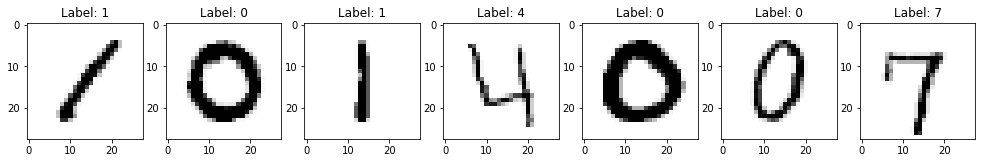

In [4]:
fig = plt.figure(figsize=(17, 17))   # UKURAN PIKSEL TIAP GAMBAR YANG DITAMPILKAN

for i in range(7):
    fig.add_subplot(1, 7, i+1)
    plt.title('Label: {label}'.format(label=labels[i]))
    plt.imshow(x_train[i].reshape(28, 28), cmap='Greys')

Sesuaikan nilai label/target :

In [5]:
kelas = 10
y_train = np.zeros([len(labels), kelas])

for i in range(len(labels)):
        y_train[i][labels[i]] = 1

### 3. Bagi data latih menjadi data uji dan data latih

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)

print("Data latih :",len(x_train))
print("Data uji   :", len(x_test))

Data latih : 37800
Data uji   : 4200


Data latih kita bagi lagi menjadi dua hal ini untuk mengetahui akurasi dari model yang kita buat.<br>
Penggunaan fungsi <b>train_test_split</b> untuk memudahkan dalam membagi data uji saja.<br>
Fungsi <b>train_test_split</b> mengembalikan empat nilai kembalian.<br>
Dua nilai kembalian pertama yang berasal dari argumen <b>x_train</b> tersimpan ke dalam variabel <b>x_train</b> dan <b>x_test</b>.<br>
Dua nilai kembalian terakhir yang berasal dari argumen <b>y_train</b> tersimpan ke dalam variabel <b>y_train</b> dan <b>y_test</b>.

### 4. Buat arsitektur jaringannya

Arsitektur jaringan kita adalah 784 <i>input unit</i>, 1000 <i>hidden unit</i>, dan 10 <i>output unit</i>.<br>
784 itu seukuran kolom tanpa kolom label.<br>
<i>Hidden unit</i> haruslah dibuat lebih banyak dari <i>input</i> dan <i>output unit</i>.<br>
Telah saya coba bahwa semakin banyak jumlah <i>hidden unit</i> maka akurasi semakin baik.<br>
10 itu adalah jumlah digit dari 0 sampai 9.

In [7]:
inpt = x_train.shape[1]   # 784 UNIT/NODE/NEURON PADA INPUT LAYER
hidden = 1000             # 1000 UNIT/NODE/NEURON PADA HIDDEN LAYER

bias = np.random.randn(hidden)
Win = np.random.normal(size=[inpt, hidden])

Win.shape

(784, 1000)

Bobot antara <i>hidden layer</i> dan <i>output layer</i> nanti akan terbentuk pada tahap pelatihan.

### 5. Inisialisasi fungsi aktivasi dan prediksi

In [8]:
def input_to_hidden(x):
    a = np.dot(x, Win)
    a += bias
    a = np.maximum(a, 0, a) # Rectified Linear Unit
    return a

Fungsi aktivasi yang saya gunakan di sini adalah ReLU.<br>
Saya gunakan ReLU karena sederhana dan hasilnya juga tidak kalah bagus(<a href="https://arxiv.org/pdf/1804.02763.pdf">Referensi 1</a>, <a href="https://www.quora.com/What-are-the-benefits-of-using-rectified-linear-units-vs-the-typical-sigmoid-activation-function">Referensi 2</a>, <a href="https://datascience.stackexchange.com/questions/23493/why-relu-is-better-than-the-other-activation-functions">Referensi 3</a>).

<img src="https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png" />

Penjelasan mengenai Sigmoid dan ReLU dapat di baca di <a href="https://www.researchgate.net/post/What_are_the_advantages_of_ReLu_over_Sigmoid_function_in_ANN">sini</a>.

In [9]:
def predict(x):
    x = input_to_hidden(x)
    y = np.dot(x, Wout)      # PERHITUNGAN DARI HIDDEN LAYER MENUJU OUTPUT LAYER
    return y

<b>np.dot</b> merupakan fungsi yang digunakan untuk operasi perkalian matriks.<br>
Menurut hukum asalnya matriks dikalikan dengan matriks akan menghasilkan suatu matriks yang baru.<br>
Baca dokumentasi lengkapnya di <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html">sini</a>.

### 6. Latih jaringannya

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/3c23b9696f0b9c900b68e71fc63b1b5a0e0cc1e1"/>

In [10]:
X = input_to_hidden(x_train)
Xt = np.transpose(X)

Wout = np.dot(np.linalg.inv(np.dot(Xt, X)), np.dot(Xt, y_train))   # BOBOT YANG SUDAH TERLATIH

Wout.shape

(1000, 10)

<b>np.transpose</b> untuk mentranspose suatu matriks.<br>
<b>np.linalg.inv</b> untuk mengembalikan nilai invers dari perkalian suatu matriks.

Cek akurasi :

In [11]:
y = predict(x_test)
betul = 0
total = len(y)

for i in range(total):
    hasil_prediksi = np.argmax(y[i])
    tes = np.argmax(y_test[i])
    betul = betul + (1 if hasil_prediksi == tes else 0)

print("Akurasi:", betul/total)

Akurasi: 0.940952380952381


### 7. Uji model

In [12]:
test  = pd.read_csv("test.csv")   # DATA UJI
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Jumlah kolom pada data uji hanyalah 784 dikarenakan tidak memiliki kolom <b>label</b>.<br>
Objektivitas pada percobaan ini adalah melabeli masing-masing data pada data uji dengan model(bobot dan bias) yang telah dilatih menggunakan metode <i>Extreme Learning Machine</i>.

In [13]:
hasil_prediksi = predict(test)

Simpan hasil prediksi ke dalam variabel <b>hasil</b>

In [14]:
hasil = []
for i in range(len(hasil_prediksi)):
       hasil.append(np.argmax(hasil_prediksi[i]))

Tujuh data awal hasil prediksi :

In [15]:
for i in range(7):
    print(hasil[i])

2
0
9
2
3
7
0


Tujuh data awal asli :

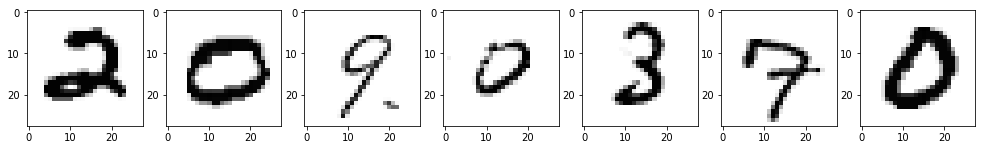

In [16]:
fig = plt.figure(figsize=(17, 17))
gambar_data_uji = test.iloc[:, 0:].values.astype('float32')

for i in range(7):
    fig.add_subplot(1, 7, i+1)
    plt.imshow(gambar_data_uji[i].reshape(28, 28), cmap='Greys')

Ada satu data yang ndak terklasifikasi dengan benar ehehe